In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# datasets
https://www.kaggle.com/c/titanic/data

In [2]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

# 데이터 기본 분석

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [5]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
print(train['Survived'].unique())
print(train['Pclass'].unique())
print(train['Sex'].unique())
print(train['Cabin'].unique())
print(train['Embarked'].unique())

[0 1]
[3 1 2]
['male' 'female']
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
['S' 'C' 'Q

# 결측치 처리

## Age 결측치 처리(호칭에 따라)

In [10]:
train_name = train['Name'].str.split("[,.]", expand=True).iloc[:, :3]
train_name.columns  = ["family_name", "honorific", "name"]
test_name = test['Name'].str.split("[,.]", expand=True).iloc[:, :3]
test_name.columns = ["family_name", "honorific", "name"]
train_name.head()

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry


In [11]:
train_df = pd.concat([train,train_name[['honorific']]],axis=1)
test_df = pd.concat([test,test_name[['honorific']]],axis=1)

In [12]:
train_df[['Age','honorific']].groupby('honorific').mean()

,Age
honorific,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167
Miss,21.773973


In [13]:
# train data의 호칭별 평균 연령으로 train과 test 데이터셋의 age 결측치를 채움
train_df['Age'] = train_df['Age'].fillna(train_df.groupby('honorific')['Age'].transform('mean')) 
test_df['Age'] = test_df['Age'].fillna(train_df.groupby('honorific')['Age'].transform('mean')) 

In [14]:
train_df['Age'].isna().sum()

0

In [15]:
test_df['Age'].isna().sum()

0

## train embarked 결측치 채우기

In [16]:
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [17]:
train_df[train_df['Cabin']=='B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [18]:
# Embarked 최빈값으로 Embarked 결측치 채우기
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

## test의 Fare 결측치 채우기

In [19]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [20]:
# train의 Pclass=3의 평균 Fare로 결측치 채우기.
test_df['Fare'] = test_df['Fare'].fillna(train_df.groupby('Pclass')['Fare'].transform('mean')) 

In [21]:
test_df.loc[152,:]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                     13.67555
Cabin                         NaN
Embarked                        S
honorific                      Mr
Name: 152, dtype: object

# 필요없는 열 제거

In [22]:
train_df = train_df.drop(['PassengerId','Name','Ticket','Cabin','honorific'],axis=1)
test_df = test_df.drop(['PassengerId','Name','Ticket','Cabin','honorific'],axis=1)

In [23]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# one-hot encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
train_encoded = encoder.fit_transform(train_df[['Pclass','Sex','Embarked']])
test_encoded = encoder.transform(test_df[['Pclass','Sex','Embarked']])

In [25]:
encoded_train_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
encoded_test_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())

## dataframe 합치기

In [26]:
train_df = train_df.drop(['Pclass','Sex','Embarked'],axis=1)
test_df = test_df.drop(['Pclass','Sex','Embarked'],axis=1)

In [27]:
train_df = pd.concat([train_df,encoded_train_df],axis=1)
test_df = pd.concat([test_df,encoded_test_df],axis=1)

In [28]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [29]:
test_df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


# train을 train와 validation으로 나누기

In [30]:
train_df_x = train_df.drop('Survived',axis=1)
train_df_y = train_df['Survived']

In [31]:
train_x, val_x, train_y, val_y = train_test_split(train_df_x, train_df_y, test_size=0.1, random_state=41, stratify=train_df_y)

# XGBoost를 사용하여 classification

In [32]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [81]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


model = XGBClassifier(random_state=41, early_stopping_rounds=10, eval_metric='logloss')


param_grid = {
    'max_depth': [3,4, 5,6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150,200],
    'subsample': [0.8,0.9, 1.0],
    'colsample_bytree': [0.8,0.9 ,1.0],
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(train_x, train_y,eval_set=[(val_x, val_y)])


print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델을 사용하여 예측
xgb_model = grid_search.best_estimator_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[0]	validation_0-logloss:0.58127
[1]	validation_0-logloss:0.52407
[2]	validation_0-logloss:0.48484
[3]	validation_0-logloss:0.45300
[4]	validation_0-logloss:0.43242
[5]	validation_0-logloss:0.41148
[6]	validation_0-logloss:0.40435
[7]	validation_0-logloss:0.39471
[8]	validation_0-logloss:0.38721
[9]	validation_0-logloss:0.38188
[10]	validation_0-logloss:0.37731
[11]	validation_0-logloss:0.37121
[12]	validation_0-logloss:0.37194
[13]	validation_0-logloss:0.37018
[14]	validation_0-logloss:0.36855
[15]	validation_0-logloss:0.36852
[16]	validation_0-logloss:0.36631
[17]	validation_0-logloss:0.36127
[18]	validation_0-logloss:0.35918
[19]	validation_0-logloss:0.36312
[20]	validation_0-logloss:0.35978
[21]	validation_0-logloss:0.36193
[22]	validation_0-logloss:0.36173
[23]	validation_0-logloss:0.36362
[24]	validation_0-logloss:0.36238
[25]	validation_0-logloss:0.36124
[26]	validation_0-logloss:0.35992
[27]	validation_0-logloss:0.

c:\Users\user\anaconda3\envs\data\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [82]:
# train_data 예측
y_train_pre = xgb_model.predict(train_x)

In [83]:
# test 데이터 예측
y_pre = xgb_model.predict(test_df)

# 성능 평가

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

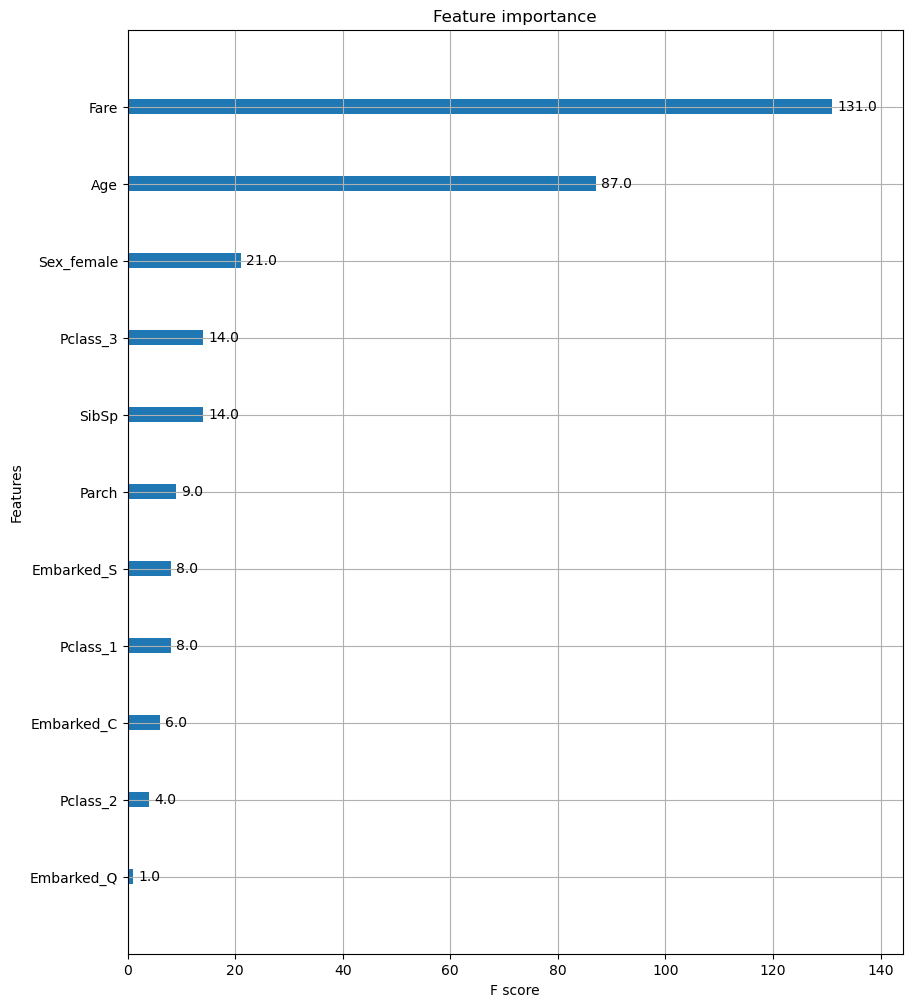

In [84]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,12))
xgb.plot_importance(xgb_model, ax=ax)

In [85]:
# train dataset를 사용하여 성능 평가
from sklearn.metrics import classification_report
print(classification_report(train_y,y_train_pre))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       494
           1       0.88      0.77      0.82       307

    accuracy                           0.87       801
   macro avg       0.88      0.85      0.86       801
weighted avg       0.87      0.87      0.87       801



In [86]:
# test dataset를 사용하여 성능 평가
answer = pd.read_csv('./dataset/answer.csv')
print(classification_report(answer['Survived'],y_pre))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       266
           1       0.88      0.80      0.83       152

    accuracy                           0.89       418
   macro avg       0.88      0.87      0.87       418
weighted avg       0.88      0.89      0.88       418



In [87]:
accuracy = accuracy_score(answer['Survived'],y_pre)
recall = recall_score(answer['Survived'],y_pre)
precision = precision_score(answer['Survived'],y_pre)
f1 = f1_score(answer['Survived'],y_pre)

In [88]:
# 결과 출력
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test F1-score: {f1:.2f}")

Test Accuracy: 0.89
Test Recall: 0.80
Test Precision: 0.88
Test F1-score: 0.83


# 코드와 데이터에 대한 설명
## 데이터에 대한 간단한 설명
해당 데이터는 kaggle의 Titanic 데이터셋으로, 타이타닉 호 탑승자의 특징과 생존여부를 정리해놓은 데이터이다.

데이터에서 Pclass는 티켓의 등급을 나타내고, 1은 1등급, 2는 2등급, 3은 3등급을 나타낸다. sex와 Age는 각각 성별과 나이를 나타내며, sibsp는 동승한 Sibling(brother, sister, stepbrother, stepsister)와 Spouse(husband, wife) 수를 나타내며, parch는 동승한 parent(mother,father)와 child(daughter, son, stepdaughter, stepson) 수를 나타낸다.

ticket은 티켓 번호, Name은 탑승자의 이름, fare는 티켓 요금, cabin은 선실 번호, embarked는 승선항을 의미한다.

## 모델에 대한 간단한 설명과 해당 모델을 선택한 이유 
xgboost는 Gradient Boosting 모델로, 여러 트리를 학습시키고, 이전에 잘 맞추지 못한 데이터에 weight를 주어서 다음 트리를 학습시켜 성능을 향상시킨다. 또한 Ensemble 시 성능이 좋은 모델에 weight를 준다. Random forest는 단순 랜덤으로 feature 및 데이터를 뽑아 학습시키고, 모든 트리의 가중치가 동일하므로, xgboost를 선택하였다.

## 하이퍼파라미터 튜닝
GridSearchCV를 통해 하이퍼파라미터 튜닝을 진행하였다. 트리의 max_depth(최대깊이), n_estimator, learning_rate(학습률), subsample(데이터 샘플링 비율), colsample_bytree(feature 샘플링 비율)을 여러 개 지정하여 GridSearch를 통해 가장 최적의 값을 찾도록 하였다. 최적의 값은 {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9} 이다.

## 데이터전처리
Age 결측치는 이름 column의 호칭(Mr, Ms, Master 등)별 평균 나이로 부여하였다.

train 데이터의 Embarked 결측치는 최빈값으로 채웠다.

test 데이터의 Fare 결측치는 train 데이터의 Pclass 별 평균 나이로 부여하였다.

Cabin feature는 결측치가 너무 많아 학습 및 평가 시 제외하였다.

이름과 티켓번호도 학습 및 평가 시 제외하였다.

'Pclass','Sex','Embarked'는 one hot encoding 처리하였다.

train data는 train:val = 0.9:0.1 로 분할하였고, train 데이터만 학습에 사용하였다.

## 간단한 결과 분석
feature importance를 볼 때 Fare가 높을 수록, Age가 많을 수록 생존 확률이 높으며, Female, Pclass_3도 생존확률을 높이는 것으로 나왔다. 테스트 정확도는 0.89가 나왔으며, Precision은 0.88, Recall은 0.8이다. classification report를 볼 때 Survived가 아닌 것은 잘 맞추나 Survived가 1인 것은 상대적으로 잘 못 맞추는데, 이는 train data의 데이터 불균형 떄문으로 보인다.(Survived가 0은 549명, 1은 342명)
